## __Frozen Lake__ ##

### __GridWorld-Based using Q Learning__ ###

Q-Table after Training:
State (0, 0): [26.97447249 54.9539     30.71475867  4.93504249]
State (0, 1): [30.99227202 62.171      28.96859738 29.25009431]
State (0, 2): [33.32558065 21.8750325  41.42956143 70.19      ]
State (0, 3): [-0.40913676 -0.48136681 -0.3940399  67.81367643]

State (1, 0): [-1.30862012 -1.30388017 24.6599319   0.85949146]
State (1, 1): [0. 0. 0. 0.]
State (1, 2): [48.94548423 79.1        38.56496612 52.27307583]
State (1, 3): [49.19614983 54.17133225 29.45256383 89.        ]

State (2, 0): [-0.76407973  8.23897084 -0.76804376 -0.56188121]
State (2, 1): [-0.43313487  1.81417127 -0.29701    26.3315983 ]
State (2, 2): [0. 0. 0. 0.]
State (2, 3): [ 57.5073965   63.32752173  60.97547643 100.        ]

State (3, 0): [0. 0. 0. 0.]
State (3, 1): [-0.19       53.85218916  1.6179965  -0.199     ]
State (3, 2): [-0.1        87.84233454  0.          0.        ]
State (3, 3): [0. 0. 0. 0.]



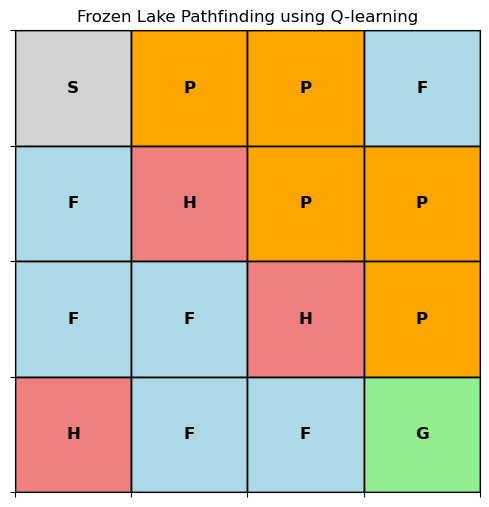

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Frozen Lake Grid dimensions and parameters
GRID_SIZE = 4  # 4x4 Grid
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Exploration rate
EPISODES = 500

# Initialize Q-table
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))  # 4 actions (up, down, left, right)

# Actions: [up, down, left, right]
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Rewards and obstacles
goal = (3, 3)  # Goal position
start = (0, 0)  # Start position

# Generate random holes avoiding start and goal
num_holes = 3
holes = set()
while len(holes) < num_holes:
    hole = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    if hole != start and hole != goal:
        holes.add(hole)
holes = list(holes)

reward_grid = np.full((GRID_SIZE, GRID_SIZE), -1)  # Default reward is -1
reward_grid[goal] = 100  # Goal reward
for hole in holes:
    reward_grid[hole] = -100  # Falling into hole penalty

def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in holes

def choose_action(state):
    if random.uniform(0, 1) < EPSILON:  # Exploration
        return random.randint(0, 3)
    else:  # Exploitation
        x, y = state
        return np.argmax(q_table[x, y])

# Training
for episode in range(EPISODES):
    state = start
    while state != goal:
        x, y = state
        action = choose_action(state)
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)
        
        if not is_valid_state(*next_state):
            next_state = state  # Stay in place if invalid move
        
        reward = reward_grid[next_state]
        next_x, next_y = next_state
        q_table[x, y, action] += ALPHA * (
            reward + GAMMA * np.max(q_table[next_x, next_y]) - q_table[x, y, action]
        )
        state = next_state

# Displaying the Q-table
print("Q-Table after Training:")
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print(f"State ({i}, {j}): {q_table[i, j]}")
    print()

# Find shortest path
path = []
state = start
visited = set()
while state != goal:
    if state in visited:
        break
    visited.add(state)
    x, y = state
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    next_state = (x + dx, y + dy)
    if next_state == state or not is_valid_state(*next_state):
        break
    path.append(next_state)
    state = next_state

# Visualizing the grid
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks(range(GRID_SIZE + 1))
ax.set_yticks(range(GRID_SIZE + 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which="major", color="black", linestyle="-", linewidth=1)
ax.invert_yaxis()

# Define colors for different states
colors = {
    "S": "lightgrey",  # Start
    "G": "lightgreen",  # Goal
    "H": "lightcoral",  # Hole
    "P": "orange",  # Path
    "F": "lightblue"
}

# Drawing the grid with colors and labels
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) == start:
            label = "S"
        elif (i, j) == goal:
            label = "G"
        elif (i, j) in holes:
            label = "H"
        elif (i, j) in path:
            label = "P"
        else:
            label = "F"
        
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=colors[label], ec="black"))
        ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

plt.title("Frozen Lake Pathfinding using Q-learning")
plt.show()

### __Dynamic Programming__ ###

Optimal Value Function:
[[0.95099005 0.96059601 0.970299   0.9801    ]
 [0.96059601 0.         0.         0.99      ]
 [0.970299   0.9801     0.         1.        ]
 [0.9801     0.99       1.         0.        ]]

Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):
[[1 2 2 1]
 [1 0 0 1]
 [1 1 0 1]
 [2 2 2 0]]
Average Reward over 10 episodes: 1.0


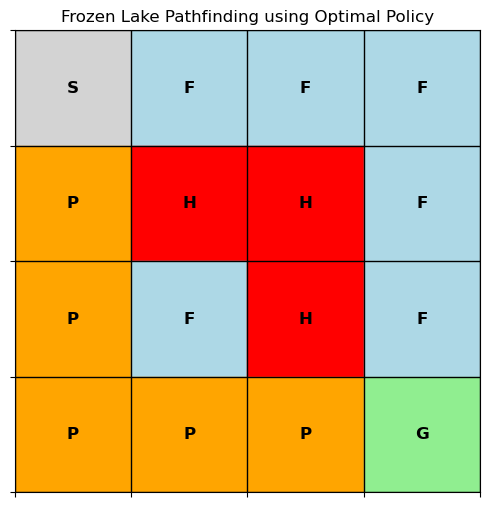

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Define a custom FrozenLake map with exactly 3 holes
custom_map = [
    "SFFF",
    "FHHF",
    "FFHF",
    "FFFG"
]

# Create the FrozenLake environment with the custom map (Deterministic Policy, No Slippery)
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=False, render_mode="ansi")
env = env.unwrapped  # Unwrap to access transition probabilities

# Initialize Value Function
value_table = np.zeros(env.observation_space.n)
discount_factor = 0.99  # Gamma

# Policy Evaluation (Value Iteration)
def value_iteration(env, value_table, discount_factor=0.99, theta=1e-8):
    while True:
        delta = 0
        new_value_table = np.copy(value_table)

        for state in range(env.observation_space.n):
            q_values = []
            for action in range(env.action_space.n):
                q_value = 0
                for prob, next_state, reward, done in env.P[state][action]:
                    q_value += prob * (reward + discount_factor * value_table[next_state] * (not done))
                q_values.append(q_value)
            new_value_table[state] = max(q_values)
            delta = max(delta, abs(new_value_table[state] - value_table[state]))

        value_table = new_value_table
        if delta < theta:
            break
    return value_table

# Compute optimal value function
optimal_value_function = value_iteration(env, value_table, discount_factor)

# Derive policy from optimal value function
def extract_policy(env, value_table, discount_factor=0.99):
    policy = np.zeros(env.observation_space.n, dtype=int)

    for state in range(env.observation_space.n):
        q_values = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for prob, next_state, reward, done in env.P[state][action]:
                q_values[action] += prob * (reward + discount_factor * value_table[next_state] * (not done))
        policy[state] = np.argmax(q_values)
    return policy

# Compute optimal policy
optimal_policy = extract_policy(env, optimal_value_function, discount_factor)

# Display results
print("Optimal Value Function:")
print(optimal_value_function.reshape(4, 4))  # Reshaped for readability
print("\nOptimal Policy (0=Left, 1=Down, 2=Right, 3=Up):")
print(optimal_policy.reshape(4, 4))  # Reshaped for readability

# Test the optimal policy in the environment
def test_policy(env, policy, episodes=10):
    total_rewards = 0
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            total_rewards += reward
    print(f"Average Reward over {episodes} episodes: {total_rewards / episodes}")

# Run the policy test
test_policy(env, optimal_policy)

# Visualize FrozenLake with Path Represented as 'P'
def visualize_solution_with_path_labels(env, policy):
    state, _ = env.reset()
    grid_size = int(np.sqrt(env.observation_space.n))
    labels = np.array(env.desc, dtype=str).reshape(grid_size, grid_size)

    # Create a copy of the labels for visualization
    grid_with_path = labels.copy()

    # Traverse the environment following the optimal policy
    done = False
    while not done:
        row, col = divmod(state, grid_size)
        if grid_with_path[row, col] not in ['S', 'G']:  # Mark path as 'P' (ignore Start and Goal)
            grid_with_path[row, col] = 'P'
        action = policy[state]
        state, reward, done, _, _ = env.step(action)

    # Mark the goal state (if reached) as 'G'
    row, col = divmod(state, grid_size)
    grid_with_path[row, col] = 'G'

    # Create a plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(range(grid_size + 1))
    ax.set_yticks(range(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, which='major', color='black', linestyle='-', linewidth=1)

    # Set colors for each state
    color_map = {"S": "lightgray", "F": "lightblue", "H": "red", "G": "lightgreen", "P": "orange"}
    for row in range(grid_size):
        for col in range(grid_size):
            label = grid_with_path[row, col]
            rect_color = color_map.get(label, "white")
            ax.add_patch(plt.Rectangle((col, grid_size - row - 1), 1, 1, color=rect_color))
            ax.text(col + 0.5, grid_size - row - 0.5, label,
                    color="black", ha="center", va="center", fontsize=12, weight="bold")

    plt.title("Frozen Lake Pathfinding using Optimal Policy")
    plt.show()

# Run visualization with path represented as 'P'
visualize_solution_with_path_labels(env, optimal_policy)